# Cuevas 2020

## Introduction

This notebook allows the visualization of the data generated by the model and its parameters presented in Cuevas2020.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
palette = ['#299D8F', '#E9C46A', '#E76F51']

## Figure 02 - Epidemics in homogeneous pathogen populations.

In [2]:
%%bash
cd ../simulations/
mkdir -p homogeneous
cp homogeneous.tar.gz ./homogeneous/
cd homogeneous/
tar xfvz homogeneous.tar.gz

free_P0/
free_P0/timeSeriesStatistics_P0.csv
free_P12/
free_P12/timeSeriesStatistics_P12.csv
free_P123/
free_P123/timeSeriesStatistics_P123.csv
homogeneous_pop.json


In [3]:
pathotypes = ['P0', 'P12', 'P123']
free_data = dict()
for patho in pathotypes:
    print("working with patho = {0}".format(patho))
    free_data[patho] = pd.read_csv(
        '../simulations/homogeneous/free_{:s}/timeSeriesStatistics_{:s}.csv'.format(patho, patho), 
        names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']
    )
    free_data[patho]['epidemic_time'] = free_data[patho]['crop']*180 + free_data[patho]['time']
    print("\tdone")

working with patho = P0
	done
working with patho = P12
	done
working with patho = P123
	done


working with patho = P0
working with patho = P12
working with patho = P123


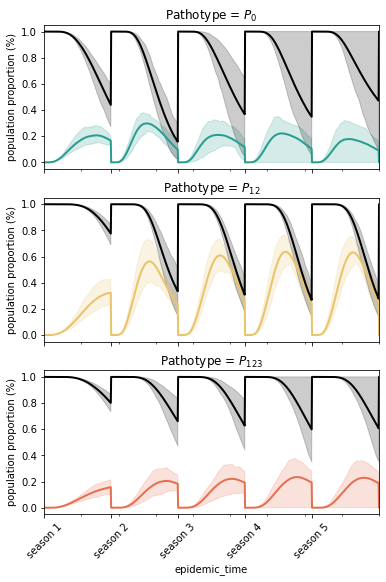

In [4]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(6, 9)
labels = ['Pathotype = $P_{0}$', 'Pathotype = $P_{12}$', 'Pathotype = $P_{123}$']
for i, patho in enumerate(['P0', 'P12', 'P123']):
    print("working with patho = {0}".format(patho))
    
    free_temp_byEpTime_upper = free_data[patho].groupby(['epidemic_time']).quantile(0.85)
    free_temp_byEpTime_lower = free_data[patho].groupby(['epidemic_time']).quantile(0.15)
    free_temp_byEpTime = free_data[patho].groupby(['epidemic_time']).mean()
    ax[i].set_title(labels[i])
    free_temp_byEpTime['infective'].plot(ax=ax[i], lw=2, c=palette[i])
    free_temp_byEpTime['alive'].plot(ax=ax[i], lw=2, c='black')
    
    x = free_temp_byEpTime.index.values
    ax[i].fill_between(x, free_temp_byEpTime_lower['infective'], 
                       free_temp_byEpTime_upper['infective'], alpha=.2, color=palette[i])
    
    ax[i].fill_between(x, free_temp_byEpTime_lower['alive'], 
                       free_temp_byEpTime_upper['alive'], alpha=.2, color='black')
    ax[i].set_ylabel('population fraction')
    ax[i].set_xlim(0, 900)
    ax[i].set_ylabel('population proportion (%)')
    if i == 2:
        ax[i].set_xticks(np.arange(0, 900, 180))
        ax[i].set_xticklabels(['season {:d}'.format(j+1) for j in range(5)], rotation=45)
    
plt.show()

## Figure 03: Heterogeneous populations (without and with co-infection)

In [5]:
%%bash
cd ../simulations/
mkdir -p heterogeneous.coinf
mkdir -p heterogeneous.nocoinf
tar xfvz heterogeneous.coinf.tar.gz
tar xfvz heterogeneous.nocoinf.tar.gz

heterogeneous.coinf/
heterogeneous.coinf/timeSeriesStatistics_P123.csv
heterogeneous.coinf/coinfection.csv
heterogeneous.coinf/heterogeneous.coinf.json
heterogeneous.coinf/timeSeriesStatistics_P0.csv
heterogeneous.coinf/timeSeriesStatistics_P12.csv
heterogeneous.nocoinf/
heterogeneous.nocoinf/timeSeriesStatistics_P123.csv
heterogeneous.nocoinf/timeSeriesStatistics_P0.csv
heterogeneous.nocoinf/timeSeriesStatistics_P12.csv


In [6]:
pathotypes = ['P0', 'P12', 'P123']
het_nocoinf = dict()
for patho in pathotypes:
    print("working with patho = {0}".format(patho))
    het_nocoinf[patho] = pd.read_csv(
        '../simulations/heterogeneous.nocoinf/timeSeriesStatistics_{:s}.csv'.format(patho, patho), 
        names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']    
    )
    het_nocoinf[patho]['epidemic_time'] = het_nocoinf[patho]['crop']*180 + het_nocoinf[patho]['time']
    print("\tdone")

working with patho = P0
	done
working with patho = P12
	done
working with patho = P123
	done


In [7]:
pathotypes = ['P0', 'P12', 'P123']
het_coinf = dict()
for patho in pathotypes:
    print("working with patho = {0}".format(patho))
    het_coinf[patho] = pd.read_csv(
        '../simulations/heterogeneous.coinf/timeSeriesStatistics_{:s}.csv'.format(patho), 
        names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']    
    )
    het_coinf[patho]['epidemic_time'] = het_coinf[patho]['crop']*180 + het_coinf[patho]['time']
    print("\tdone")

working with patho = P0
	done
working with patho = P12
	done
working with patho = P123
	done


In [8]:
def plot_time_infectious_acc_series(ax, data, query):
    for i, patho in enumerate(['P0', 'P12', 'P123']):
        data_patho = data[patho].query(query)
        x_upper = data_patho.groupby(['epidemic_time']).quantile(0.85)
        x_lower = data_patho.groupby(['epidemic_time']).quantile(0.15)
        x_mean =  data_patho.groupby(['epidemic_time']).mean()
        x_mean['infective'].plot(
            ax=ax, lw=2, c=palette[i], label = 'infective %s' % patho,
        )
        t = x_mean.index.values
        ax.fill_between(t, x_lower['infective'], 
                           x_upper['infective'], alpha=.2, color=palette[i])        
    

def plot_time_alive_series(ax, data, query):
    
    patho = 'P123'
    data_patho = data[patho].query(query)
    x_upper = data_patho.groupby(['epidemic_time']).quantile(0.85)
    x_lower = data_patho.groupby(['epidemic_time']).quantile(0.15)
    x_mean =  data_patho.groupby(['epidemic_time']).mean()
    x_mean['alive'].plot(
        ax=ax, lw=2, c='black', label = 'infective %s' % patho,
    )
    t = x_mean.index.values
    ax.fill_between(t, x_lower['alive'], 
                       x_upper['alive'], alpha=.2, color='black')        
    

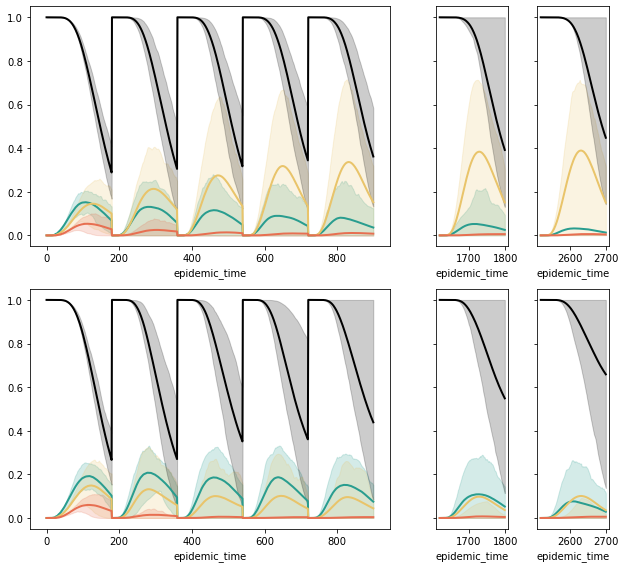

In [9]:
fig, ax = plt.subplots(2, 3, sharex=False, sharey=True, subplot_kw=dict(aspect='equal'),
                              gridspec_kw=dict(width_ratios=[5, 1, 1]))
fig.set_size_inches(9, 8)
plot_time_infectious_acc_series(ax[0, 0], het_nocoinf, 'crop < 5')
plot_time_alive_series(ax[0, 0], het_nocoinf, 'crop < 5')

plot_time_infectious_acc_series(ax[1, 0], het_coinf, 'crop < 5')
plot_time_alive_series(ax[1, 0], het_coinf, 'crop < 5')

plot_time_infectious_acc_series(ax[0, 1], het_nocoinf, 'crop >= 9 and crop < 10')
plot_time_alive_series(ax[0, 1], het_nocoinf, 'crop >= 9 and crop < 10')

plot_time_infectious_acc_series(ax[1, 1], het_coinf, 'crop >= 9 and crop < 10')
plot_time_alive_series(ax[1, 1], het_coinf, 'crop >= 9 and crop < 10')

plot_time_infectious_acc_series(ax[0, 2], het_nocoinf, 'crop >= 14')
plot_time_alive_series(ax[0, 2], het_nocoinf, 'crop >= 14')

plot_time_infectious_acc_series(ax[1, 2], het_coinf, 'crop >= 14')
plot_time_alive_series(ax[1, 2], het_coinf, 'crop >= 14')

ax[0,0].set_aspect(600)
ax[0,1].set_aspect(600)
ax[1,0].set_aspect(600)
ax[1,1].set_aspect(600)
ax[0,2].set_aspect(600)
ax[1,2].set_aspect(600)
plt.tight_layout()

plt.show()

## Figure 04: Effect of resistance, homogeneous population

In [10]:
%%bash
cd ../simulations/
tar xfz homogeneous.resmix.tar.gz
tar xfz heterogeneous.resmix.coinf.tar.gz

In [11]:
levels = [i for i in range(6)]
pathotypes = ['P0', 'P12', 'P123']
try :
    del resistance_data
except NameError:
    pass
for p in pathotypes:
    for l in levels:
        folder_name = '../simulations/homogeneous.resmix/res_{:d}_{:s}/'.format(l, p)
        file_name   = 'timeSeriesStatistics_{:s}.csv'.format(p)
        temp = pd.read_csv(
            folder_name + file_name,
            names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']
        )
        temp['epidemic_time'] = temp['crop']*180 + temp['time']
        temp['level'] = l
        temp['pathotype'] = p
        temp['crop'] = temp['crop'] + 1
        try :
            resistance_data = pd.concat((resistance_data, temp))
        except NameError:
            resistance_data = temp.copy()
            
del temp

In [12]:
resistance_by_level_crop = resistance_data.groupby(['level', 'crop', 'pathotype', 'sim'], 
                                                   as_index=False).max()

resistant_fraction = np.arange(0.0, 1.2, 0.2)
resistance_by_level_crop['susceptible_population'] = resistance_by_level_crop['level'].apply(lambda x : 1 - resistant_fraction[x])
resistance_by_level_crop['resistant_fraction'] = resistance_by_level_crop['level'].apply(lambda x : resistant_fraction[x])

/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


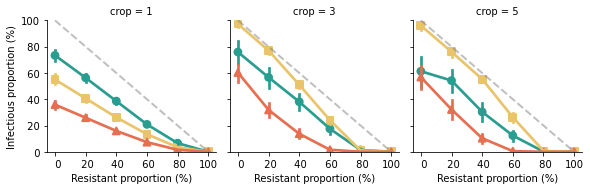

In [13]:
g = sns.FacetGrid(
    resistance_by_level_crop.query('crop == 1 or crop == 3 or crop == 5'),  
    col = 'crop', col_wrap=3,
    hue='pathotype', size = 2.75, hue_kws=dict(markers=["o", "s", "^"]), palette=palette, ylim=(0.0,1.0))#, despine = False)

g = g.map(sns.pointplot, 'level', 'infective_ac')
g.axes[0].plot([0, 5], [1, 0], color='gray', linewidth=2, alpha=0.5, linestyle='--')
g.axes[1].plot([0, 5], [1, 0], color='gray', linewidth=2, alpha=0.5, linestyle='--')
g.axes[2].plot([0, 5], [1, 0], color='gray', linewidth=2, alpha=0.5, linestyle='--')
#g.add_legend()
g.set_xticklabels([i for i in resistant_fraction])
g.set_xlabels('Resistant proportion (%)')
g.set_ylabels('Infectious proportion (%)')

g.set_xticklabels(['{:3d}'.format(int(i * 100)) for i in resistant_fraction])
# g.set_yticks(np.arange(0, 1.001, 0.2))
ytick_labels = ['{:3d}'.format(int(i * 100)) for i in g.axes[0].get_yticks()]
# ytick_labels[0] = ''; ytick_labels[-1] = ''
g.set_yticklabels(ytick_labels)

# plt.savefig('C:/Users/Bruno/Dropbox/ARTICULOS/cpv_2016/figures/figure_4.png', dpi=300)
plt.show()

In [14]:
resistance_by_level_crop = resistance_data.groupby(['level', 'crop', 'pathotype', 'sim'], 
                                                   as_index=False).min()

resistant_fraction = np.arange(0.0, 1.2, 0.2)
resistance_by_level_crop['susceptible_population'] = resistance_by_level_crop['level'].apply(lambda x : 1 - resistant_fraction[x])
resistance_by_level_crop['resistant_fraction'] = resistance_by_level_crop['level'].apply(lambda x : resistant_fraction[x])

/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


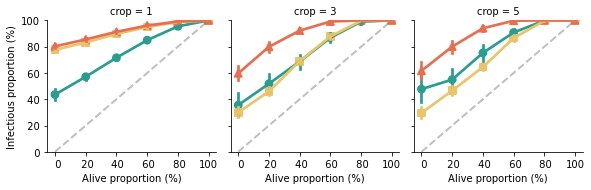

In [15]:
g = sns.FacetGrid(
    resistance_by_level_crop.query('crop == 1 or crop == 3 or crop == 5'),  
    col = 'crop', col_wrap=3,
    hue='pathotype', size = 2.75, hue_kws=dict(markers=["o", "s", "^"]), palette=palette, ylim=(0.0,1.0))#, despine = False)

g = g.map(sns.pointplot, 'level', 'alive')
g.axes[0].plot([0, 5], [0, 1], color='gray', linewidth=2, alpha=0.5, linestyle='--')
g.axes[1].plot([0, 5], [0, 1], color='gray', linewidth=2, alpha=0.5, linestyle='--')
g.axes[2].plot([0, 5], [0, 1], color='gray', linewidth=2, alpha=0.5, linestyle='--')
#g.add_legend()
g.set_xticklabels([i for i in resistant_fraction])
g.set_xlabels('Alive proportion (%)')
g.set_ylabels('Infectious proportion (%)')

g.set_xticklabels(['{:3d}'.format(int(i * 100)) for i in resistant_fraction])
ytick_labels = ['{:3d}'.format(int(i * 100)) for i in g.axes[0].get_yticks()]
g.set_yticklabels(ytick_labels)

plt.show()

## Figure 05: Effect of resistance, heterogeneous population

In [16]:
pathotypes = ['P0', 'P12', 'P123']
resistance_mixing_types = ['LpL2', 'LpL3', 'LpL4']
try :
    del res_data
except NameError:
    pass
for i in resistance_mixing_types :
    for j in range(6):
        for k in pathotypes :
            foldername =  '../simulations/heterogeneous.resmix.coinf/res_C_{:s}_{:d}'.format(i, j)
            tmp = pd.read_csv(
                foldername + '/timeSeriesStatistics_%s.csv' % k,
                names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']
            )
            tmp['sim_time'] = (tmp['crop'] * 180) + tmp['time']
            tmp['pathotype'] = k
            tmp['resistance_mix'] = i
            tmp['resistance_mix_level'] = j
            tmp['crop'] = tmp['crop'] + 1 
            try :
                res_data = pd.concat((tmp, res_data))
            except NameError:
                res_data = tmp

In [17]:
resistance_by_level_crop = res_data.groupby(['resistance_mix_level', 'resistance_mix', 'crop', 'pathotype', 'sim'], 
                                                   as_index=False).max()
resistant_fraction = np.arange(0.0, 1.2, 0.2)
resistance_by_level_crop['susceptible_population'] = resistance_by_level_crop['resistance_mix_level'].apply(lambda x : 1 - resistant_fraction[x])
resistance_by_level_crop['resistant_fraction'] = resistance_by_level_crop['resistance_mix_level'].apply(lambda x : resistant_fraction[x])

/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


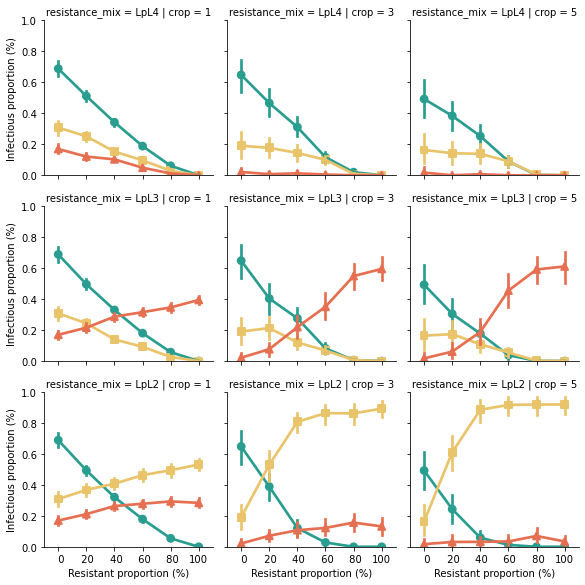

In [18]:
g = sns.FacetGrid(
    resistance_by_level_crop.query('crop == 1 or crop == 3 or crop == 5'),  
    col = 'crop', row='resistance_mix', row_order=['LpL4', 'LpL3', 'LpL2'],
    hue='pathotype', size = 2.75, hue_kws=dict(markers=["o", "s", "^"]), palette=palette, ylim=(0.0,1.0),
)
g = g.map(sns.pointplot, 'resistance_mix_level', 'infective_ac')
g.set_xticklabels([i for i in resistant_fraction])
g.set_xlabels('Resistant proportion (%)')
g.set_ylabels('Infectious proportion (%)')
g.set_xticklabels(['{:3d}'.format(int(i * 100)) for i in resistant_fraction])
plt.show()

In [19]:
resistance_by_level_crop = res_data.groupby(['resistance_mix_level', 'resistance_mix', 'crop', 'pathotype', 'sim'], 
                                                   as_index=False).min()

resistant_fraction = np.arange(0.0, 1.2, 0.2)
resistance_by_level_crop['susceptible_population'] = resistance_by_level_crop['resistance_mix_level'].apply(lambda x : 1 - resistant_fraction[x])
resistance_by_level_crop['resistant_fraction'] = resistance_by_level_crop['resistance_mix_level'].apply(lambda x : resistant_fraction[x])

/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


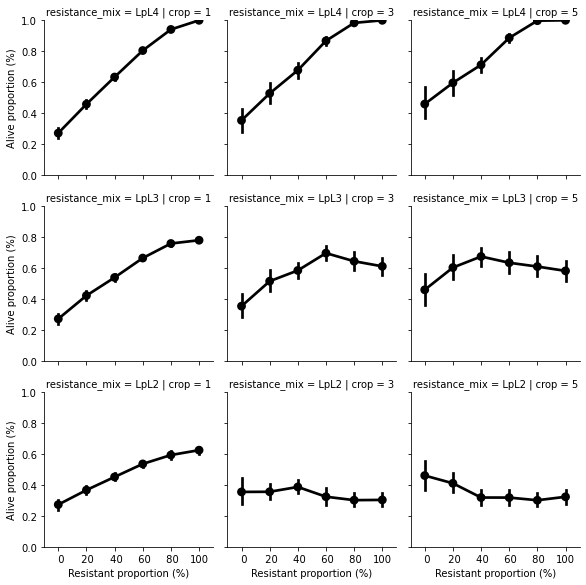

In [20]:
g = sns.FacetGrid(
    resistance_by_level_crop.query('(crop == 1 or crop == 3 or crop == 5) and pathotype=="P0"'),  
    col = 'crop', row='resistance_mix', row_order=['LpL4', 'LpL3', 'LpL2'],
    hue='pathotype', size = 2.75, hue_kws=dict(markers=["o", "s", "^"]), palette=['black'], ylim=(0.0,1.0),
)#, despine = False)

g = g.map(sns.pointplot, 'resistance_mix_level', 'alive')
g.set_xticklabels([i for i in resistant_fraction])
g.set_xlabels('Resistant proportion (%)')
g.set_ylabels('Alive proportion (%)')
g.set_xticklabels(['{:3d}'.format(int(i * 100)) for i in resistant_fraction])
plt.show()

## Figure 06: Sanity, homogeneous population

In [21]:
%%bash
cd ../simulations/
tar xfz homogeneous.sanity.tar.gz

In [22]:
try :
    del  sanity_data
except NameError:
    pass
pathotypes = ['P0', 'P12', 'P123']
sanity_values = 10 ** np.arange(-2.0, 0.25, 0.25)
for patho in pathotypes:
    for san_index in range(len(sanity_values)) :
        
        print("working with patho = {0}".format(patho))
        folder = '../simulations/homogeneous.sanity/sanity_{:d}_{:s}'.format(san_index, patho)
        temp = pd.read_csv(
            '{:s}/timeSeriesStatistics_{:s}.csv'.format(
                folder ,patho
            ), names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']
        )
        temp['epidemic_time'] = temp['crop']*180 + temp['time']
        temp['sanity'] = sanity_values[san_index]
        temp['sanity_index'] = san_index
        temp['pathotype'] = patho
        temp['crop'] = temp['crop'] + 1 
        try:
            sanity_data = pd.concat((sanity_data, temp))
        except NameError:
            sanity_data = temp

working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123


/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


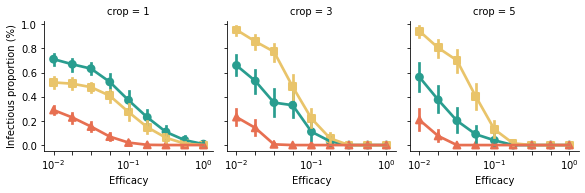

In [23]:
sanity_dammage = sanity_data.groupby(['crop', 'sanity_index', 'sim', 'pathotype'], as_index=False).max().query('crop==1 or crop == 3 or crop ==5')

x_ticklabels = ['$10^{-2}$', '', '', '', '$10^{-1}$', '', '', '', '$10^{0}$']
g = sns.FacetGrid(col='crop',hue='pathotype', data=sanity_dammage, col_wrap=3, size=2.75,
                 hue_kws=dict(markers=["o", "s", "^"]), palette=palette)
g = g.map(sns.pointplot, "sanity_index", "infective_ac", lw = 1.0, marker='o', ci=95)
g.set_xlabels('Efficacy')
g.set_ylabels('Infectious proportion (%)')
g.set_xticklabels(x_ticklabels)
plt.show()

/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


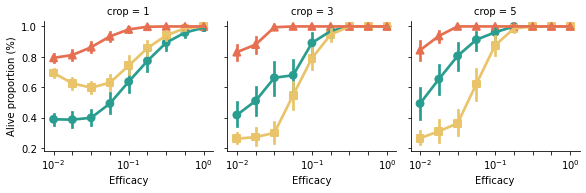

In [24]:
sanity_dammage = sanity_data.groupby(['crop', 'sanity_index', 'sim', 'pathotype'], as_index=False).min().query('crop==1 or crop == 3 or crop ==5')
x_ticklabels = ['$10^{-2}$', '', '', '', '$10^{-1}$', '', '', '', '$10^{0}$']
g = sns.FacetGrid(col='crop',hue='pathotype', data=sanity_dammage, col_wrap=3, size=2.75,
                 hue_kws=dict(markers=["o", "s", "^"]), palette=palette)
g = g.map(sns.pointplot, "sanity_index", "alive", lw = 1.0, marker='o', ci=95)
g.set_xlabels('Efficacy')
g.set_ylabels('Alive proportion (%)')
g.set_xticklabels(x_ticklabels)
plt.show()

In [25]:
%%bash
cd ../simulations/
tar xfz heterogeneous.sanity.coinf.tar.gz

In [26]:
try :
    del  sanity_data
except NameError:
    pass
pathotypes = ['P0', 'P12', 'P123']
sanity_values = 10 ** np.arange(-2.0, 0.25, 0.25)
for patho in pathotypes:
    for san_index in range(len(sanity_values)) :
        
        print("working with patho = {0}".format(patho))
        folder = '../simulations/heterogeneous.sanity.coinf/sanity_C_{:d}'.format(san_index)
        temp = pd.read_csv(
            '{:s}/timeSeriesStatistics_{:s}.csv'.format(
                folder ,patho
            ), names=['crop', 'time', 'exposition', 'infective', 'infective_ac', 'alive', 'inoculum', 'coinfected', 'sim']
        )
        temp['epidemic_time'] = temp['crop']*180 + temp['time']
        temp['sanity'] = sanity_values[san_index]
        temp['sanity_index'] = san_index
        temp['pathotype'] = patho
        temp['crop'] = temp['crop'] + 1
        try:
            sanity_data = pd.concat((sanity_data, temp))
        except NameError:
            sanity_data = temp

working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P0
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P12
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123
working with patho = P123


/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


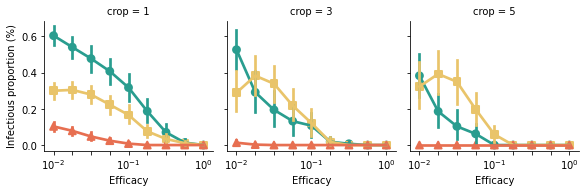

In [27]:
sanity_dammage = sanity_data.groupby(['crop', 'sanity_index', 'sim', 'pathotype'], as_index=False).max().query('crop==1 or crop == 3 or crop ==5')

x_ticklabels = ['$10^{-2}$', '', '', '', '$10^{-1}$', '', '', '', '$10^{0}$']
g = sns.FacetGrid(col='crop',hue='pathotype', data=sanity_dammage, col_wrap=3, size=2.75,
                 hue_kws=dict(markers=["o", "s", "^"]), palette=palette)
g = g.map(sns.pointplot, "sanity_index", "infective_ac", lw = 1.0, marker='o', ci=95)
g.set_xlabels('Efficacy')
g.set_ylabels('Infectious proportion (%)')
g.set_xticklabels(x_ticklabels)
plt.show()

/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/bcz/miniconda3/envs/analysis-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


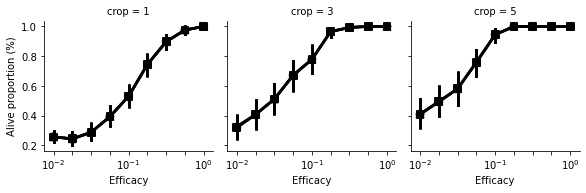

In [28]:
sanity_dammage = sanity_data.groupby(['crop', 'sanity_index', 'sim', 'pathotype'], as_index=False).min().query('crop==1 or crop == 3 or crop ==5')
x_ticklabels = ['$10^{-2}$', '', '', '', '$10^{-1}$', '', '', '', '$10^{0}$']
g = sns.FacetGrid(col='crop',hue='pathotype', data=sanity_dammage, col_wrap=3, size=2.75,
                 hue_kws=dict(markers=["o", "s", "^"]), palette=['black'])
g = g.map(sns.pointplot, "sanity_index", "alive", lw = 1.0, marker='o', ci=95)
g.set_xlabels('Efficacy')
g.set_ylabels('Alive proportion (%)')
g.set_xticklabels(x_ticklabels)
plt.show()